## Machine Learning Project 2 - Classifiers
## Jorge Narváez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import read_pickle_data, write_pickle_data, plot_images, get_MNIST_data
from linear_regression import compute_test_error_linear, closed_form
from svm import one_vs_rest_svm, multi_class_svm, compute_test_error_svm
from softmax import softmax_regression, compute_test_error, plot_cost_function_over_time
from softmax import update_y, compute_test_error_mod3
from softmax import softmax_kernel_regression, compute_kernel_test_error
from features import plot_PC, principal_components, project_onto_PC, center_data, cubic_features, reconstruct_PC
from kernel import linear_kernel, polynomial_kernel, rbf_kernel

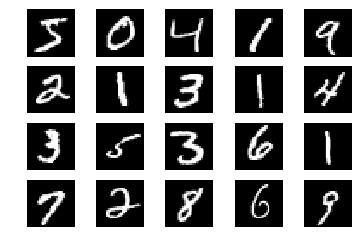

In [2]:
#######################################################################
# 1. Introduction
#######################################################################

# Load MNIST data:
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])

In [19]:
#######################################################################
# 2. Linear Regression with Closed Form Solution
#######################################################################

def run_linear_regression_on_MNIST(lambda_factor=1):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error

lambda_factors = [1, 0.1, 0.01]
print('\nLinear Regression \ttest_error:')
for lambda_factor in lambda_factors:
    lr_test_error = run_linear_regression_on_MNIST(lambda_factor=lambda_factor)
    print('(lambda = {})\t\t{:3}'.format(lambda_factor, lr_test_error))
    
print("\nWhat went Wrong?")
print("The loss function related to the closed-form solution is inadequate for this problem")


Linear Regression 	test_error:
(lambda = 1)		0.7697
(lambda = 0.1)		0.7698
(lambda = 0.01)		0.7702

What went Wrong?
The loss function related to the closed-form solution is inadequate for this problem


In [20]:
#######################################################################
# 3. Support Vector Machine
#######################################################################

def run_svm_one_vs_rest_on_MNIST(C=0.1):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x, C)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

Cs = [0.001, 0.01, 0.1, 1]
print('\nSVM one vs. rest \ttest_error:')
for C in Cs:
    svm_one_vs_rest_test_error = run_svm_one_vs_rest_on_MNIST(C)
    print('(C = {})  \t\t{:.4}'.format(C, svm_one_vs_rest_test_error))


def run_multiclass_svm_on_MNIST(C=0.1):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x, C)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

Cs = [0.001, 0.01, 0.1]
print('\nMulticlass SVM \t\ttest_error:')
for C in Cs:
    multiclass_svm_test_error = run_multiclass_svm_on_MNIST(C)
    print('(C = {})  \t\t{:.4}'.format(C, multiclass_svm_test_error))
    
print("\nwhat statement is true about the C parameter?")
print("Larger C gives smaller tolerance of violation")
print("Larger C gives a larger-margin separating hyperplane")



SVM one vs. rest 	test_error:
(C = 0.001)  		0.0076
(C = 0.01)  		0.0073
(C = 0.1)  		0.0075
(C = 1)  		0.0085

Multiclass SVM 		test_error:
(C = 0.001)  		0.0873
(C = 0.01)  		0.0829
(C = 0.1)  		0.0819

what statement is true about the C parameter?
Larger C gives smaller tolerance of violation
Larger C gives a larger-margin separating hyperplane



Explain how the temperature parameter affects the probability of a sample x(i) 
        being assigned a label that has a large θ. What about a small θ?
Smaller temperature leads to less variance


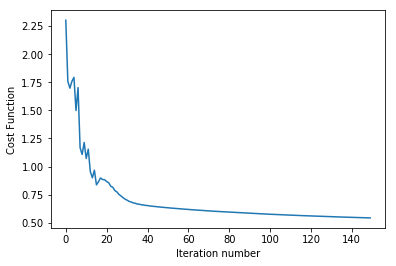

(t = 0.5)  		0.084
(t = 1)  		0.101
(t = 2)  		0.126
softmax original 	test_error


In [22]:
#######################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
#######################################################################

def run_softmax(model, train_x, train_y, temp_parameter, k=10, plot_cost=False, folder_cache='./softmax'):
    """
    Runs softmax_regression on the training set
    
    It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Returns:
        Final theta
    """
    theta = read_pickle_data("{}/softmax_{}_theta_{}.pkl.gz".format(folder_cache, model,temp_parameter))
    if theta is None:
        theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, 
                                                          lambda_factor=1.0e-4, k=k, num_iterations=150)
        # Save the model parameters theta obtained from calling softmax_regression to disk.
        write_pickle_data(theta, "{}/softmax_{}_theta_{}.pkl.gz".format(folder_cache, model,temp_parameter))
        write_pickle_data(cost_function_history, "{}/softmax_{}_cost_{}.pkl.gz".format(folder_cache, model,temp_parameter))
    if plot_cost:
        cost = read_pickle_data("{}/softmax_{}_cost_{}.pkl.gz".format(folder_cache, model, temp_parameter))
        plot_cost_function_over_time(cost)
    return theta

print("""\nExplain how the temperature parameter affects the probability of a sample x(i) 
        being assigned a label that has a large θ. What about a small θ?""")
print("Smaller temperature leads to less variance")

temp_parameters = [0.5, 1, 2]
plot= [True, False, False]
for i in range(len(temp_parameters)):
    theta = run_softmax("original", train_x, train_y, temp_parameters[i], plot_cost=plot[i])
    softmax_test_error = compute_test_error(test_x, test_y, theta, temp_parameters[i])
    print('(t = {})  \t\t{:.3}'.format(temp_parameters[i], softmax_test_error))
print('softmax original \ttest_error')


In [23]:
#######################################################################
# 6. Changing Labels
#######################################################################

temp_parameters = [0.5, 1, 2]

print('\nsoftmax original \ttest_error_mod3:')
for temp_parameter in temp_parameters:
    theta = run_softmax("original", train_x, train_y, temp_parameter)
    test_error_mod3 = compute_test_error_mod3(test_x, update_y(test_y), theta, temp_parameter)
    print('(t = {})  \t\t{:.3}'.format(temp_parameter, test_error_mod3))

print("""\nNow suppose that instead we want to retrain our classifier with the new labels. 
        How do you expect the performance to change using the new labels?""")
print("Decrease")
    
print('\nsoftmax mod3 \t\ttest_error:')
for temp_parameter in temp_parameters:
    theta = run_softmax("mod3", train_x, update_y(train_y), temp_parameter, 3)
    test_error = compute_test_error(test_x, update_y(test_y), theta, temp_parameter)
    print('(t = {})  \t\t{:.3}'.format(temp_parameter, test_error))


softmax original 	test_error_mod3:
(t = 0.5)  		0.0643
(t = 1)  		0.0768
(t = 2)  		0.0978

Now suppose that instead we want to retrain our classifier with the new labels. 
        How do you expect the performance to change using the new labels?
Decrease

softmax mod3 		test_error:
(t = 0.5)  		0.257
(t = 1)  		0.188
(t = 2)  		0.184


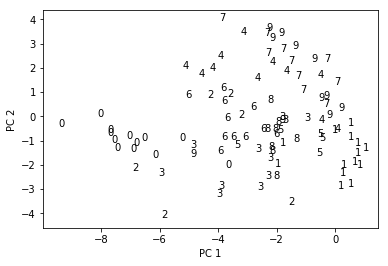

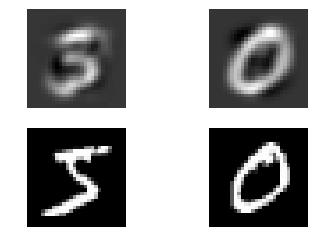

In [7]:
#######################################################################
# 8. Dimensionality Reduction Using PCA
#######################################################################

n_components = 18
train_x_c, mean = center_data(train_x)
pcs = principal_components(train_x_c)
train_pca = project_onto_PC(train_x_c, pcs, n_components)
test_pca = project_onto_PC(test_x-mean, pcs, n_components)

# Scatterplot of the first 100 MNIST images, as represented in the space 
# spanned by the first 2 principal components found above.
plot_PC(train_x[range(100), ], pcs, train_y[range(100)])

# First and second MNIST images as reconstructed solely from their 18-dimensional 
# principal component representation, compared with the originals.
firstimage_reconstructed = reconstruct_PC(train_pca[0, ], pcs, n_components, train_x)
secondimage_reconstructed = reconstruct_PC(train_pca[1, :], pcs, n_components, train_x)
plot_images(np.vstack((firstimage_reconstructed, secondimage_reconstructed, train_x[0, :], train_x[1, :])))


In [8]:
#######################################################################
# 9. Cubic Features
#######################################################################

#Find the 10-dimensional PCA representation of the training and test set
train_pca10 = project_onto_PC(train_x_c, pcs, 10)
test_pca10 = project_onto_PC(test_x-mean, pcs, 10)
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.
train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)

In [15]:
#######################################################################
# 7. Classification Using Manually Crafted Features
#######################################################################

temp_parameter = 1

# Train softmax regression model using (train_pca, train_y)
# and evaluate its accuracy on (test_pca, test_y).
theta = run_softmax("pca18", train_pca, train_y, temp_parameter)
test_error = compute_test_error(test_pca, test_y, theta, temp_parameter)
print('\nsoftmax pca18 \t\ttest_error:')
print('(t = {})  \t\t{:.3}'.format(temp_parameter, test_error))

# train softmax regression model using (train_cube, train_y)
# and evaluate its accuracy on (test_cube, test_y).
theta = run_softmax("pca10_cube", train_cube, train_y, temp_parameter)
test_error = compute_test_error(test_cube, test_y, theta, temp_parameter)
print('\nsoftmax pca10_cube \ttest_error:')
print('(t = {})  \t\t{:.3}'.format(temp_parameter, test_error))


softmax pca18 		test_error:
(t = 1)  		0.147

softmax pca10_cube 	test_error:
(t = 1)  		0.085


In [18]:
#######################################################################
# 10. Kernel Methods
#######################################################################

def run_kernel_softmax(model, kernel, train_x, train_y, temp_parameter, k=10, plot_cost=False, folder_cache='./softmax'):
    """
    Runs softmax_regression on the training set
    
    It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Returns:
        Final theta
    """
    theta = read_pickle_data("{}/softmax_kernel_{}_theta_{}.pkl.gz".format(folder_cache, model,temp_parameter))
    if theta is None:
        theta, cost_function_history = softmax_kernel_regression(train_x, train_y, kernel, temp_parameter, 
                                                                 alpha=0.3, lambda_factor=1.0e-4, k=k, num_iterations=150)
        # Save the model parameters theta obtained from calling softmax_regression to disk.
        write_pickle_data(theta, "{}/softmax_kernel_{}_theta_{}.pkl.gz".format(folder_cache, model,temp_parameter))
        write_pickle_data(cost_function_history, "{}/softmax_kernel_{}_cost_{}.pkl.gz".format(folder_cache, model,temp_parameter))
    if plot_cost:
        cost = read_pickle_data("{}/softmax_kernel_{}_cost_{}.pkl.gz".format(folder_cache, model, temp_parameter))
        plot_cost_function_over_time(cost)
    return theta

temp_parameter = 1
# ********************* Memoria Insuficiente en el NoteBook para correr esta sección *************************
# theta = run_kernel_softmax("lineal_pca18", linear_kernel, train_pca, train_y, temp_parameter)
# test_error = compute_kernel_test_error(test_pca, test_y, linear_kernel, theta, train_pca, temp_parameter)
test_error = 0.147  # Valor obtenido al correr el algoritmo en un espacio con suficiente memoria
print('\nsoftmax_kernel lineal_pca18 \t\ttest_error:')
print('(t = {})  \t\t\t\t{:.3}'.format(temp_parameter, test_error))

c, p = 0.5, 2
kernel = lambda X,Y: polynomial_kernel(X,Y, c, p)
# ********************* Memoria Insuficiente en el NoteBook para correr esta sección *************************
# theta = run_kernel_softmax("polinomial_{}_{}_pca18".format(c,p), kernel, train_pca, train_y, temp_parameter)
# test_error = compute_kernel_test_error(test_pca, test_y, kernel, theta, train_pca, temp_parameter)
test_error = 0.0411 # Valor obtenido al correr el algoritmo en un espacio con suficiente memoria
print('\nsoftmax_kernel polinomial_pca18 \ttest_error:')
print('(t = {}, c = {}, p = {})  \t\t{:.3}'.format(temp_parameter, c, p, test_error))

gamma = 1
kernel = lambda X,Y: rbf_kernel(X, Y, gamma)
# ********************* Memoria Insuficiente en el NoteBook para correr esta sección *************************
# theta = run_kernel_softmax("rbf_{}_pca18".format(gamma), kernel, train_pca, train_y, temp_parameter)
# test_error = compute_kernel_test_error(test_pca, test_y, kernel, theta, train_pca, temp_parameter)
test_error = 0.0347 # Valor obtenido al correr el algoritmo en un espacio con suficiente memoria
print('\nsoftmax_kernel rbf_pca18 \t\ttest_error:')
print('(t = {}, gamma = {})  \t\t\t{:.3}'.format(temp_parameter, gamma, test_error))


softmax_kernel lineal_pca18 		test_error:
(t = 1)  				0.147

softmax_kernel polinomial_pca18 	test_error:
(t = 1, c = 0.5, p = 2)  		0.0411

softmax_kernel rbf_pca18 		test_error:
(t = 1, gamma = 1)  			0.0347
